# Exam Agenda

## (b) Focus on how linear and non-linear models can be learned using matrix inverses. Discuss the relationship between model complexity (e.g., polynomial degree) and the amount of data needed to accurately train these models with matrix inverses.
* the 5-steps of learning a linear and non-linear model
    - Create dataset
    - Separate input and labels
    - Construct design matrix
    - Compute weights using matrix inversion
    - Plot
- Learn linear models with matrix inverse
    - If knowns = unknowns
    $$\begin{array}{cccc}
        A & w & = & b
        \\
        \begin{bmatrix}
        x_1 & 1\\
        x_2 & 1
        \end{bmatrix} &
        \begin{bmatrix}
        w_0 \\ w_1
        \end{bmatrix}&
        =
        &
        \begin{bmatrix}
        y_1 \\ y_2
        \end{bmatrix}
        \end{array}
    $$

* Bottom of this Jupyter notebook
    * Demonstrate how to learn a linear model using matrix inverses (proof on the blackboard)
        - We want to learn a model to predict salary given years of experience
        - Dataset: $[(1, 25000), (6, 60000)]$
    * Demonstrate a perfectly determined example on linear and non-linear models
    * Demonstrate a overdetermined example on a linear model (Least Squares)
* How much data do we need to train the model?
    * Direct relationship between number of unknowns in model and amount of data required
        * Linear: 2
        * Quadratic: 3
        * N-degree polynomial: N + 1
    * Data = unknown 🙂
    * Data > unknown 😃
    * Data < unknown 😣

# Line fitting the matrix way
This in-class exercise walks you through the following steps to fit a line to several datasets:
1. Create the datasets.
2. Seperate the input and the labels.
3. Construct design matrices.
4. Compute the weights using matrix inversion.
5. Plot the data and the fitted line.

## Linear (line) models
<article class="message task"><a class="anchor" id="loading"></a>
    <div class="message-header">
        <span>Task 1: Identifying parameters</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Run the cell below to load the neccessary libraries and to construct the datasets.

2. Identify the inputs and the labels of each dataset. 




</div></article>



In [2]:
import numpy as np
import matplotlib.pyplot as plt

dataset_1 = np.array([[10, 2], [9, 6]])
dataset_2 = np.array([[5, 1], [7, 5]])
dataset_3 = np.array([[4, 2], [5, 3]])

<article class="message task"><a class="anchor" id="loading2"></a>
    <div class="message-header">
        <span>Task 2: Identifying parameters and constructing the design matrix</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Complete the `separate_inputs_labels`
 function below. The function should take a dataset as input and return the inputs and labels separated into separate variables. The function should return a matrix `X`
 containing the inputs and an array `y`
 containing the labels. Use the function to obtain the inputs and labels for each dataset.

<article class="message is-warning">
  <div class="message-header">Hint</div>
  <div class="message-body">

  Slicing might be helpful here.


  </div>
</article>
2. Complete the code below and construct the design matrix for the other datasets. Print your results.



</div></article>



In [3]:
def separate_inputs_labels(dataset):
    """
    This function takes a dataset as input and returns the inputs and labels.
    
    Parameters:
    dataset (numpy array): The dataset to be separated.
    
    Returns:
    X (numpy array): The input matrix.
    y (numpy array): The labels array.
    """
    # separate the inputs and labels
    X = dataset[:, :-1]
    y = dataset[:, -1]
    # return the results as a tuple
    return X, y

# construct the design matrix    
def design_matrix(dataset):
    length = len(dataset)
    X = np.zeros((length,length))
    for i in range(length):
        for j in range(length):
            x = (int(dataset[i][0])**(length-1-j))
            X[i][j] = x
    
    return X

X1, y1 = separate_inputs_labels(dataset_1)
X2, y2 = separate_inputs_labels(dataset_2)
X3, y3 = separate_inputs_labels(dataset_3)
X1_design = design_matrix(dataset_1)
X2_design = design_matrix(dataset_2)
X3_design = design_matrix(dataset_3)

# Print the datasets
print("X1 = \n",X1)
print("y1 =", y1)
print("Design Matrix for Dataset 1:\n", X1_design)

X1 = 
 [[10]
 [ 9]]
y1 = [2 6]
Design Matrix for Dataset 1:
 [[10.  1.]
 [ 9.  1.]]


<article class="message task"><a class="anchor" id="loading3"></a>
    <div class="message-header">
        <span>Task 3: Solve for model parameters</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Find the inverse of the design matrix for each dataset constructed above.
2. Calculate the model weights, then print your results.
3. Use the `plot_model`
 function to plot your results.
4. Visually inspect the plots and interpret the meaning and influence of each term.



</div></article>



Weights for Dataset 1: [-4. 42.]
Weights for Dataset 2: [ 2. -9.]
Weights for Dataset 3: [ 1. -2.]


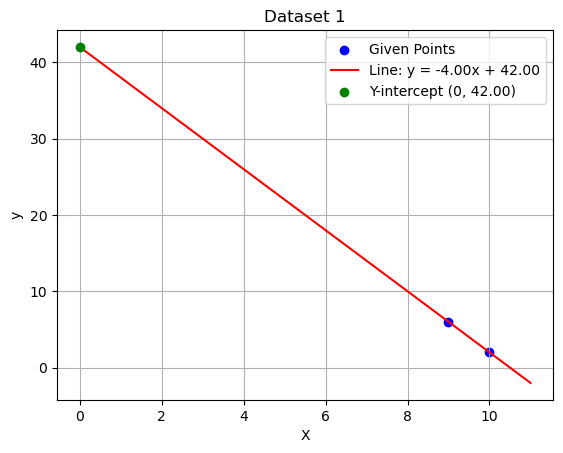

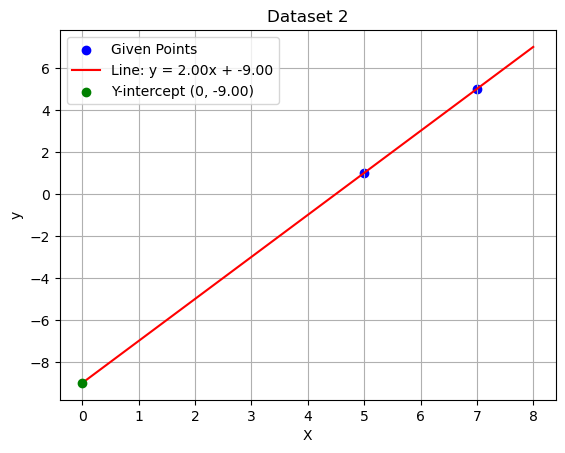

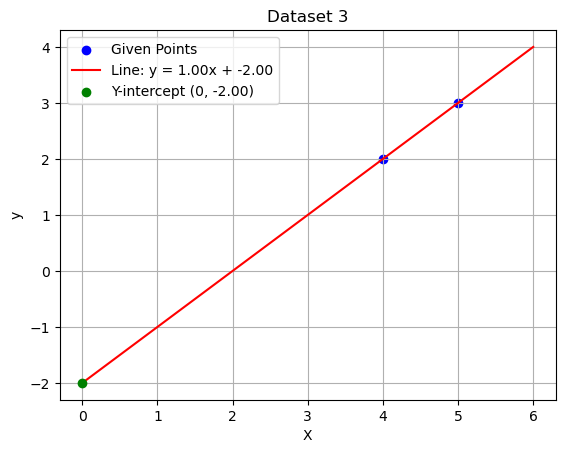

In [4]:
# find the inverse and calculate the weights
inverse_1 = np.linalg.inv(X1_design)
weights1 = inverse_1 @ y1

inverse_2 = np.linalg.inv(X2_design)
weights2 = inverse_2 @ y2

inverse_3 = np.linalg.inv(X3_design)
weights3 = inverse_3 @ y3

print("Weights for Dataset 1:", weights1)
print("Weights for Dataset 2:", weights2)
print("Weights for Dataset 3:", weights3)

# Function to plot data points and fitted line
def plot_model(X, y, weights, dataset_name):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')
    
    # Extend x_vals range to include zero for correct y-intercept visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals + weights[1]
    
    # Plot the fitted line
    plt.plot(x_vals, y_vals, color='red', label=f'Line: y = {weights[0]:.2f}x + {weights[1]:.2f}')
    
    # Plot the y-intercept
    plt.scatter(0, weights[1], color='green', zorder=5, label=f'Y-intercept (0, {weights[1]:.2f})')
    
    # Add title and labels
    plt.title(dataset_name)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
    

plot_model(X1, y1, weights1, 'Dataset 1')
plot_model(X2, y2, weights2, 'Dataset 2')
plot_model(X3, y3, weights3, 'Dataset 3')

If you have more time, complete the next task.
<article class="message task"><a class="anchor" id="loading5"></a>
    <div class="message-header">
        <span>Task 4: A new dataset</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-infinity"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


Run the cell below to define a new dataset.
1. Identify the inputs and the labels, then reuse the code from previous tasks to construct a design matrix.
2. Calculate the inverse of the design matrix. This step should result in an error. What are the possible reasons for getting this error?

**Note:** For pedagogical reasons, next week we will return to this dataset, as you will have the necessary tools to fit a model for this scenario.



</div></article>



In [5]:
dataset_4 = np.array([[9, 1], [7, 2],[3, 8], [1, 3],[4, 3]])

# Q3: b) Learning a linear model using matrix inverses (unique solution)

X_exam (input matrix) = 
[[1]
 [6]] 

y_exam (labels array) = 
[25000 60000] 

Design Matrix for exam dataset:
 [[1. 1.]
 [6. 1.]] 

Inverse of the design matrix for exam dataset:
[[-0.2  0.2]
 [ 1.2 -0.2]] 

Weights for exam dataset: [ 7000. 18000.]


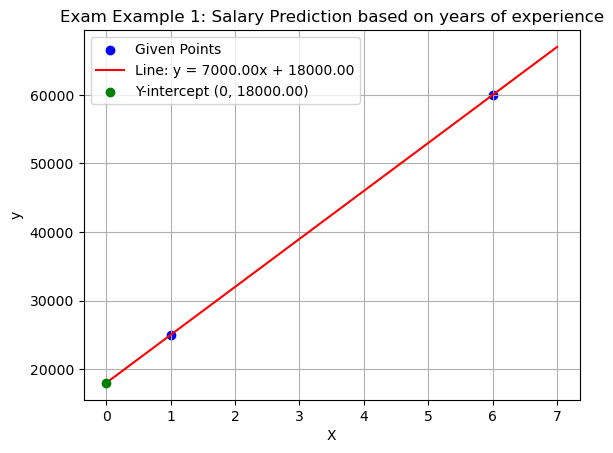

In [6]:
# In this example, we want to learn a linear model to predict the 
# salary of a person based on the number of years of experience.

# Say we have a dataset with two columns:
# - The first column represents the number of years of experience
# - The second column represents the salary

dataset_exam = np.array([[1, 25000], [6, 60000]])

# Step 1: Separate the inputs and labels
X_exam, y_exam = separate_inputs_labels(dataset_exam)
print(f"X_exam (input matrix) = \n{X_exam} \n")
print(f"y_exam (labels array) = \n{y_exam} \n")

# Step 2: Construct the design matrix
X_exam_design = design_matrix(dataset_exam)
print(f"Design Matrix for exam dataset:\n {X_exam_design} \n")

# Step 3: Find the inverse and calculate the weights using the design matrix
inverse_exam = np.linalg.inv(X_exam_design)
print(f"Inverse of the design matrix for exam dataset:\n{inverse_exam} \n", )
weights_exam = inverse_exam @ y_exam

print("Weights for exam dataset:", weights_exam)

plot_model(X_exam, y_exam, weights_exam, 'Exam Example 1: Salary Prediction based on years of experience')

# Learning a non-linear model using matrix inverses (unique solution)

Design Matrix for Dataset 1:
 [[1. 1. 1.]
 [4. 2. 1.]
 [9. 3. 1.]]
Model parameters for Model 1: [ 1. -2.  3.]


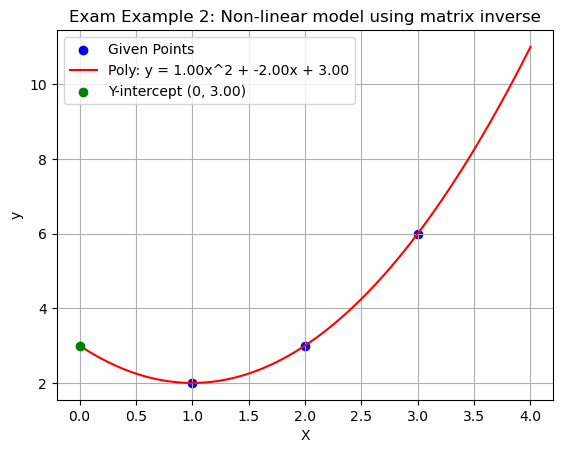

In [ ]:
# From week 4: Polynomials
# In this example, we demonstrate how to learn a non-linear model using matrix inversion
# We will realize that the process is the same as to the linear model

# Function to plot data points and fitted quadratic model
def plot_quadratic_model(X, y, weights, title):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')

    # Extend x_vals range to include zero for correct visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals**2 + weights[1] * x_vals + weights[2]

    # Plot the fitted polynomial
    plt.plot(x_vals,
             y_vals,
             color='red',
             label=f'Poly: y = {weights[0]:.2f}x^2 + {weights[1]:.2f}x + {weights[2]:.2f}')

    # Plot the y-intercept
    plt.scatter(0, weights[2], color='green', zorder=5, label=f'Y-intercept (0, {weights[2]:.2f})')

    # Add title and labels
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


# We define the datasets
quadratic_dataset_1 = np.array([[1, 2],
                                [2, 3],
                                [3, 6]])

# Applying the function to each quadratic dataset
X1_quadratic, y1_quadratic = separate_inputs_labels(quadratic_dataset_1)

# Construct the design matrix for the quadratic dataset
X1_quadratic_design = design_matrix(quadratic_dataset_1)
print("Design Matrix for Dataset 1:\n", X1_quadratic_design)

inverse_1 = np.linalg.inv(X1_quadratic_design)
weights1_quadratic = inverse_1 @ y1_quadratic
print("Model parameters for Model 1:", weights1_quadratic)

plot_quadratic_model(X1_quadratic, y1_quadratic, weights1_quadratic, "Exam Example 2: Non-linear model using matrix inverse")

# Using least squares to learn a linear regression model

X_exam (input matrix) = 
[1 2 3 4 6]
y_exam (labels array) = 
[25000 33000 29000 36000 40000]
Design Matrix for exam dataset:
 [[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [6. 1.]]
Weights for exam dataset: [ 2729.72972973 23864.86486486]


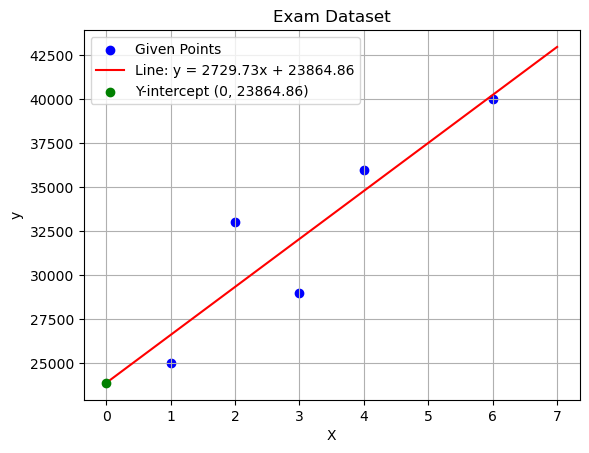

In [ ]:
# Sometimes it's not possible to find the inverse of the design matrix
# because it's not a square matrix
# In this case we can use the linear least squares method to find the weights

# Let's extend the dataset with more points than the number of unknowns
dataset_exam = np.array([[1, 25000], [2, 33000], [3, 29000], [4, 36000], [6, 40000]])

# The steps are still the same ...
# Step 1: Separate the inputs (x-values) and labels (y-values)
X_exam, y_exam = separate_inputs_labels(dataset_exam)
print(f"X_exam (input matrix) = \n{X_exam}")
print(f"y_exam (labels array) = \n{y_exam}")

# Step 2: Construct the design matrix for linear regression
def design_matrix_linear(X):
    # Add a bias term (column of 1s)
    n = len(X)
    return np.column_stack((X, np.ones(X.shape[0])))

X_exam_design = design_matrix_linear(X_exam)
print("Design Matrix for exam dataset:\n", X_exam_design)

# Step 3: Calculate the weights using linear least squares method
# Formula: w = (X.T @ X)^-1 @ X.T @ y
weights_exam = np.linalg.inv(X_exam_design.T @ X_exam_design) @ X_exam_design.T @ y_exam

print("Weights for exam dataset:", weights_exam)

# Step 4: Plot the data points and the regression line
plot_model(X_exam, y_exam, weights_exam, 'Exam Dataset 3: Linear Regression using Linear Least Squares')
